In [1]:
import pandas as pd
import numpy as np
from glob import glob

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# set font size
font = {'size'   : 20}
mpl.rc('font', **font)

# Define input file directory

Provided you have processed the RAW files with process_sampling_scan.py before!

In [4]:
fname = "/Users/artur/cernbox/HGCAL/HGCROC/v2/measurements/test_TC_samp_scan_250DAC/dataframe.h5"

In [5]:
df_chans = pd.read_hdf(fname)

In [6]:
for col in df_chans.columns:
    if col == "ch_type": continue
    df_chans[col] = df_chans[col].astype("int")

In [7]:
# exclude phase == 15 due to instability
#df_chans = df_chans[df_chans.phase != 15]

In [8]:
#df_chans["delay"] = df_chans.bx * 25 + (df_chans.phase-1)%15 * 25./16. 
df_chans["delay"] = df_chans.bx * 25 + df_chans.phase * 25./16. 

In [9]:
df_chans.sort_values("delay", inplace=True)

In [10]:
df_chans.head()

event  bx  wadd  channel ch_type  adc  toa  tot  df_id  chan  phase  \
0        1   0   396        0  normal   77    0    0      0     0      0   
203      1   0   400       56  normal  111    0    0     16     1      0   
204      1   0   400       65  normal  155    0    0     16     1      0   
205      1   0   400       67  normal  111    0    0     16     1      0   
206      1   0   400       68  normal  139    0    0     16     1      0   

     delay  
0      0.0  
203    0.0  
204    0.0  
205    0.0  
206    0.0

# Analyze single file (one channel)

Find channels that were "hit"

In [11]:
hit_chans = df_chans.chan.unique()
# limit to two channels
hit_chans = hit_chans[:2]
# add same array with 36 offset
hit_chans = np.append(hit_chans, hit_chans + 36)
hit_chans

array([ 0,  1, 36, 37])

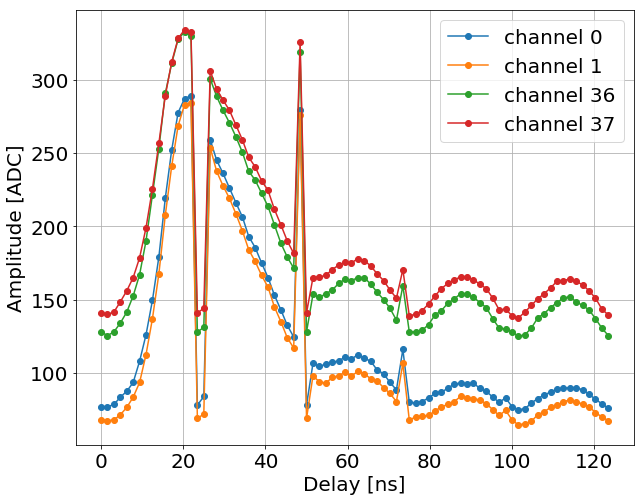

In [12]:
plt.figure(figsize = (10,8))

for chan in hit_chans:
    sel = df_chans.channel == chan
    df_sel = df_chans[sel]

    # profile
    prof = df_sel.groupby("delay")["adc"].median()
    x = prof.index
    y = prof.values

    #y -= np.median(y)
    plt.plot(x,y , "o-", label = "channel %i" %chan)

plt.legend()
plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [ADC]")

plt.grid()

Text(0,0.5,u'TOA')

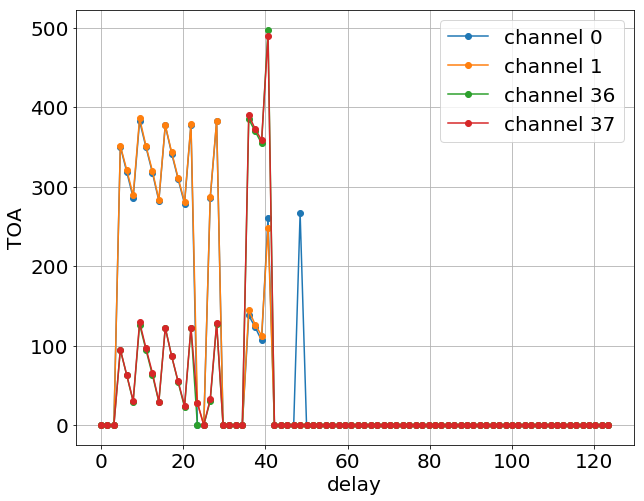

In [13]:
plt.figure(figsize = (10,8))

for chan in hit_chans:

    sel = df_chans.channel == chan
    #sel &= df_chans.adc > 200
    df_sel = df_chans[sel]

    # profile
    prof = df_sel.groupby("delay")["toa"].median()
    x = prof.index
    y = prof.values

    #y -= np.median(y)
    plt.plot(x,y , "o-", label = "channel %i" %chan)
    
plt.grid()
plt.legend()
plt.xlabel("delay")
plt.ylabel("TOA")

Look at single channel

In [14]:
sel = df_chans.channel == hit_chans[0]
sel &= df_chans.chan == hit_chans[0]

df_sel = df_chans[sel]

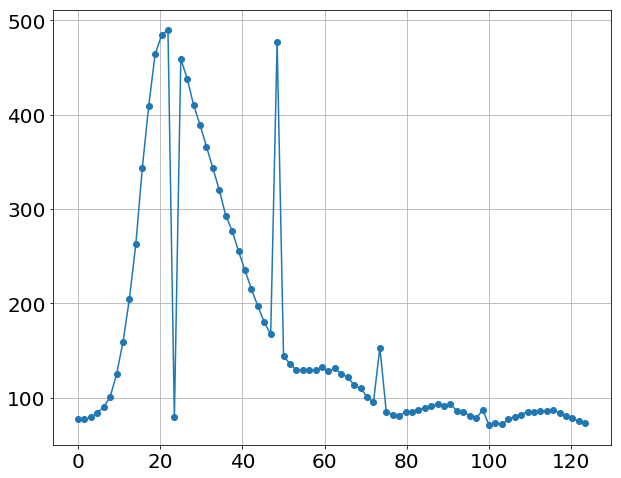

In [15]:
plt.figure(figsize = (10,8))



x = df_sel.delay
y = df_sel.adc

#x = (x-2)#%15
plt.plot(x,y , "o-")
plt.grid()

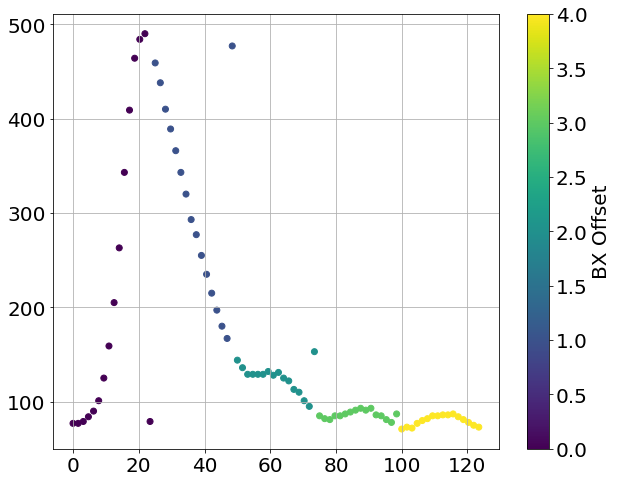

In [16]:
plt.figure(figsize = (10,8))

c = df_sel.bx
x = df_sel.delay
y = df_sel.adc

#x = (x-2)#%15
plt.scatter(x,y, c = c)
plt.grid()
plt.colorbar(label = "BX Offset")

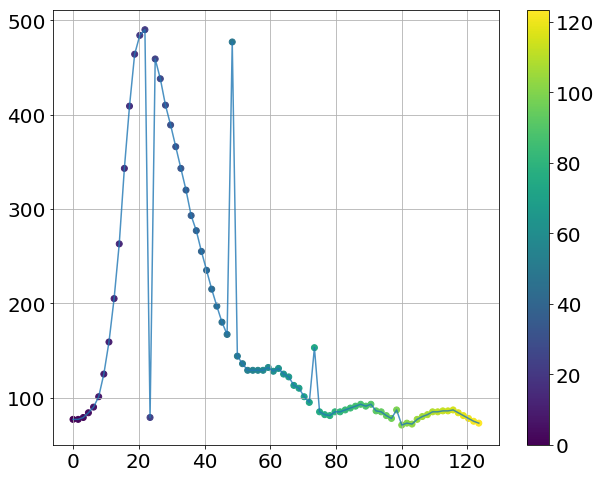

In [17]:
plt.figure(figsize = (10,8))

x = df_sel.delay
y = df_sel.adc

plt.scatter(x,y, c=df_sel.delay)
plt.plot(x,y , "-", alpha = 0.8)

plt.grid()
plt.colorbar()

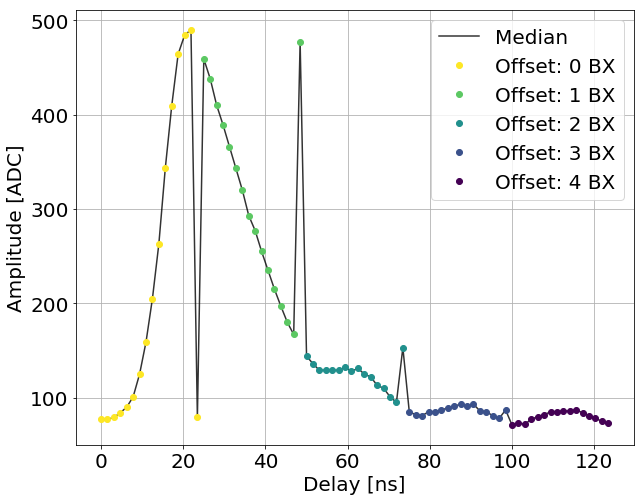

In [18]:
plt.figure(figsize = (10,8))

# profile
prof = df_sel.groupby("delay")["adc"].median()
x = prof.index
y = prof.values

plt.plot(x,y , "k-", alpha = 0.8, label = "Median")

plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [ADC]")

plt.grid()

offs = df_sel.bx.unique()
colors = plt.cm.viridis_r(np.linspace(0,1,len(offs)))

for i, offset in enumerate(offs):
    col = colors[i]
    #col = "C%i"%i
    
    sel = df_sel.bx == offset

    x = df_sel[sel].delay
    y = df_sel[sel].adc

    plt.plot(x,y, "o", color =  col, label = "Offset: %i BX"%(offset))

plt.legend()

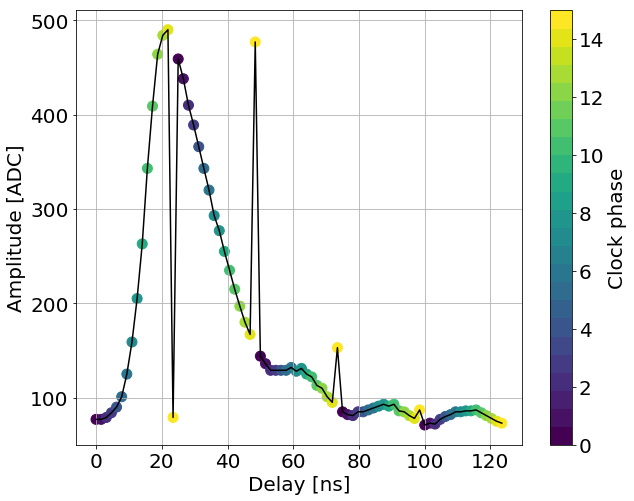

In [19]:
plt.figure(figsize = (10,8))

## color
x = df_sel.delay
y = df_sel.adc

cmap = plt.get_cmap('viridis', 24) #df_sel.bx.unique())) 

plt.scatter(x,y, s =100, c=df_sel.phase,cmap = cmap)
plt.colorbar(label = "Clock phase")

# profile
prof = df_sel.groupby("delay")["adc"].median()
x = prof.index
y = prof.values

plt.plot(x,y , "k-")#, alpha = 0.8)

plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [ADC]")

plt.grid()

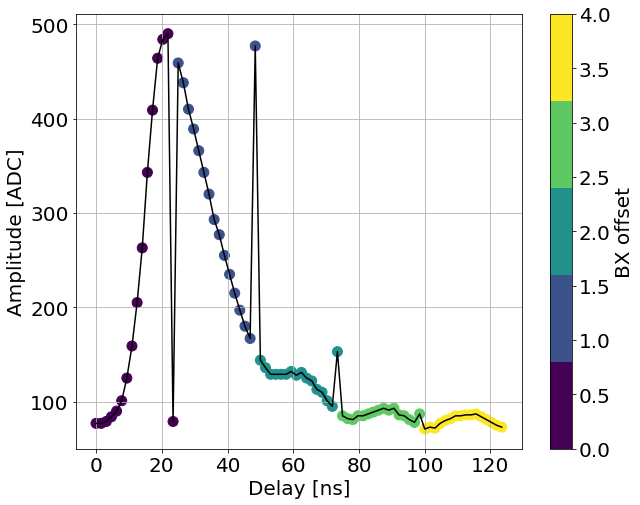

In [20]:
plt.figure(figsize = (10,8))

## color
x = df_sel.delay
y = df_sel.adc

cmap = plt.get_cmap('viridis', len(df_sel.bx.unique())) 

plt.scatter(x,y, s =100, c=df_sel.bx,cmap = cmap)
plt.colorbar(label = "BX offset")

# profile
prof = df_sel.groupby("delay")["adc"].median()
x = prof.index
y = prof.values

plt.plot(x,y , "k-")#, alpha = 0.8)

plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [ADC]")

plt.grid()

## TOA

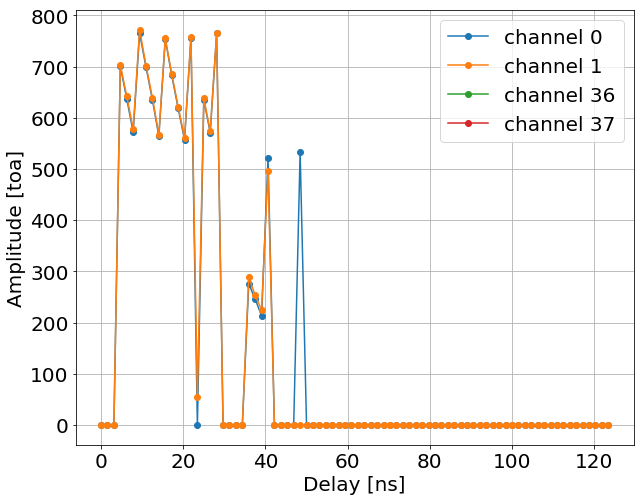

In [21]:
plt.figure(figsize = (10,8))

for chan in hit_chans:
    sel = df_chans.channel == chan
    sel &= df_chans.chan == chan

    #sel &= df_chans.delay < 10
    df_sel = df_chans[sel]

    # profile
    prof = df_sel.groupby("delay")["toa"].median()
    x = prof.index
    y = prof.values

    plt.plot(x,y , "o-", label = "channel %i" %chan)

plt.legend()
plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [toa]")

plt.grid()

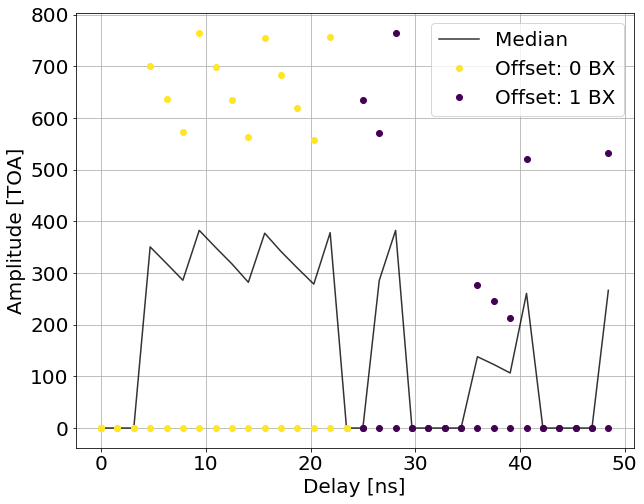

In [22]:
plt.figure(figsize = (10,8))

sel = df_chans.channel == hit_chans[0]
sel &= df_chans.bx < 2
df_sel = df_chans[sel]

# profile
mean = df_sel.groupby("delay")["toa"].median()
x = mean.index
y = mean.values

plt.plot(x,y , "k-", alpha = 0.8, label = "Median")

plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [TOA]")

plt.grid()

offs = df_sel.bx.unique()
colors = plt.cm.viridis_r(np.linspace(0,1,len(offs)))

for i, offset in enumerate(offs):
    col = colors[i]
    #col = "C%i"%i
    
    sel = df_sel.bx == offset

    x = df_sel[sel].delay
    y = df_sel[sel].toa

    plt.plot(x,y, "o", color =  col, label = "Offset: %i BX"%(offset))

plt.legend()

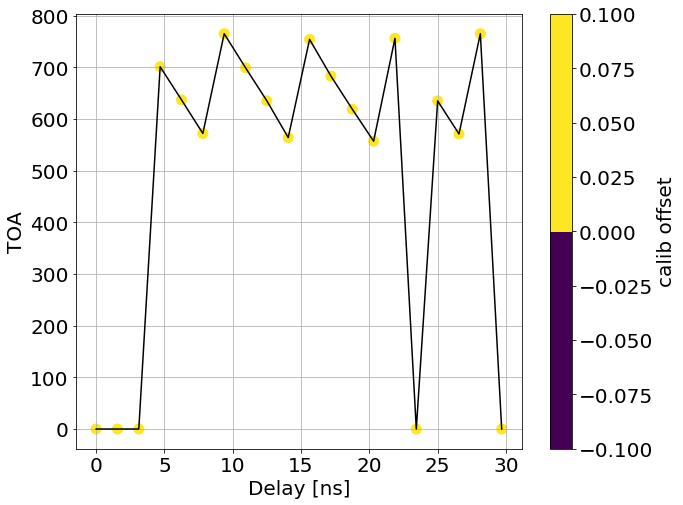

In [23]:
plt.figure(figsize = (10,8))

sel = df_chans.channel == hit_chans[0]
sel &= df_chans.chan == hit_chans[0]

sel &= df_chans.delay < 30
df_sel = df_chans[sel]

## color
x = df_sel.delay
y = df_sel.toa

cmap = plt.get_cmap('viridis', len(df_sel.bx.unique())) 

plt.scatter(x,y, s =100, c=df_sel.bx//25,cmap = cmap)
plt.colorbar(label = "calib offset")

# profile
mean_toa = df_sel.groupby("delay")["toa"].median()
x = mean_toa.index
y = mean_toa.values

plt.plot(x,y , "k-")#, alpha = 0.8)

plt.xlabel("Delay [ns]")
plt.ylabel("TOA")

plt.grid()

Find peaking time sample

Maximum at delay 21.875
Maximum at delay 21.875


(0, 50)

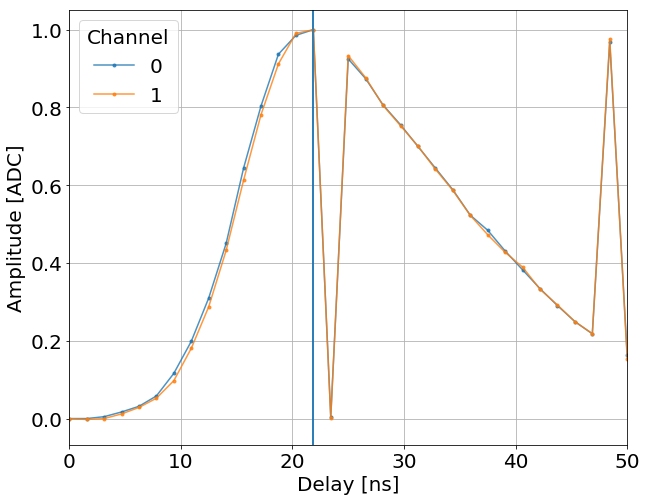

In [24]:
plt.figure(figsize = (10,8))

for chan in hit_chans:
    sel = df_chans.channel == chan
    sel &= df_chans.chan == chan

    df_sel = df_chans[sel]

    # profile
    prof = df_sel.groupby("delay")["adc"].median()
    x = prof.index * 1.
    y = prof.values * 1.
    
    sel = ~np.isnan(x) & ~np.isnan(y)
    x = x[sel]; y = y[sel]

    if not np.any(y): continue # check not empty return
    y -= y[0]
    y /= y.max()
    
    plt.plot(x,y , ".-", alpha = 0.8, label = chan)
    
    print "Maximum at delay", x[y.argmax()]
    plt.gca().axvline(x[y.argmax()], 0,1)

plt.xlabel("Delay [ns]")
plt.ylabel("Amplitude [ADC]")
    
plt.legend(title = "Channel")

plt.grid()
plt.xlim(0,50)

# Cross-talk

36 empty
37 empty
36 empty
37 empty


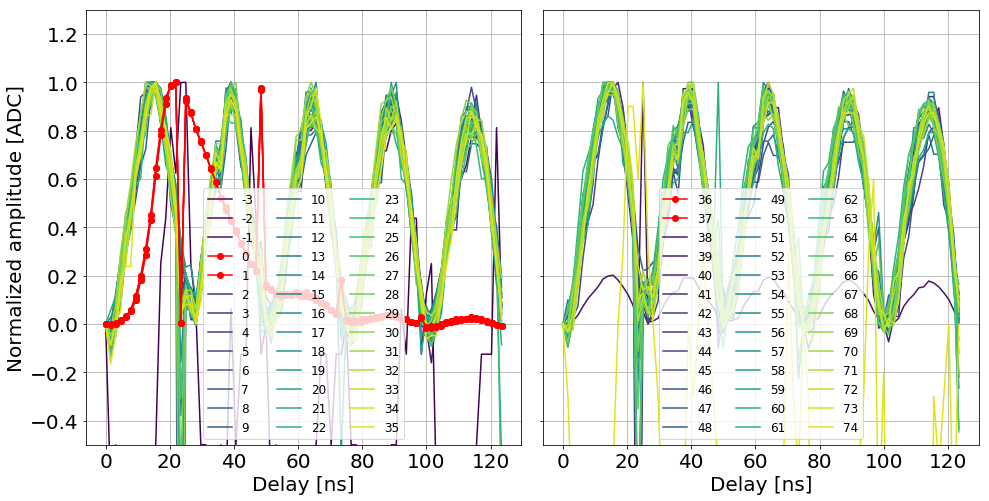

In [25]:
f, axs = plt.subplots(1,2, figsize = (16,8), sharey = True)

chans = sorted(df_chans.channel.unique()) + hit_chans.tolist()

colors = plt.cm.viridis(np.linspace(0,1,len(chans)/2))

for chan in chans:
    col = colors[(chan+3)%39]
    
    ax = axs[0] if chan < 36 else axs[1]
    
    sel = df_chans.channel == chan

    if chan in hit_chans:
        sel &= df_chans.chan == chan
    else:
        sel &= df_chans.chan != chan

    #sel &= df_chans.phase != 15*25/16.

    df_sel = df_chans[sel]

    # profile
    prof = df_sel.groupby("delay")["adc"].mean()
    x = prof.index * 1.
    y = prof.values * 1.

    if np.sum(y) == 0:
        print chan, "empty"
        #continue
    else:
        y -= y[0]
        y /= y.max()
    
    if chan in hit_chans:
        col = "r"
        style = "o-"
    else:
        style = "-"
    
    ax.plot(x,y , style, label = chan, color = col)
    
axs[0].set_ylabel("Normalized amplitude [ADC]")

for ax in axs:
    ax.set_xlabel("Delay [ns]")
    ax.legend(ncol = 3, fontsize = 12)

    ax.set_ylim(-.5,1.3)
    ax.grid()
    
f.subplots_adjust(wspace=0.05)